In [17]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt

# I 4.1

**Flipping bits**

In [7]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    qubit = np.array([1,0]) #Estado |0>
    

    
    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state == 1:
        qml.PauliX(wires=0)
    # APPLY U TO THE STATE
    qml.QubitUnitary(U,wires=0)
    return qml.state()
    
state = 1
varied_initial_state(state)

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

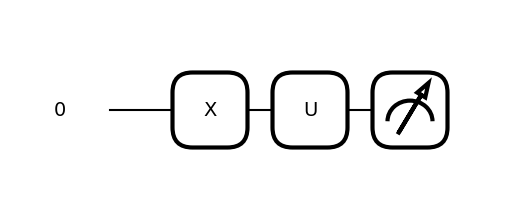

In [8]:
fig, ax = qml.draw_mpl(varied_initial_state)(state)
plt.show()

# I 4.2

**Uniform superposition**

In [15]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)
    # RETURN THE STATE
    return qml.state()

apply_hadamard()
    

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

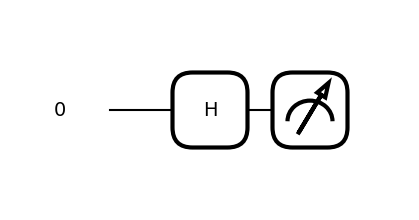

In [18]:
fig, ax = qml.draw_mpl(apply_hadamard)()
plt.show()

# I 4.3

**Combining X and H**

In [31]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state == 1:
        qml.PauliX(wires=0)
    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)
    # RETURN THE STATE

    return qml.state()


state = 0
apply_hadamard_to_state(state)

print("State |0> :", apply_hadamard_to_state(0))
print("State |1> : ", apply_hadamard_to_state(1))


State |0> : [0.70710678+0.j 0.70710678+0.j]
State |1> :  [ 0.70710678+0.j -0.70710678+0.j]


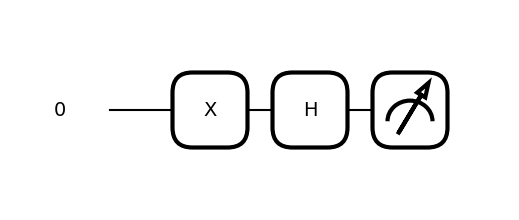

In [27]:
fig, ax = qml.draw_mpl(apply_hadamard_to_state)(state)
plt.show()

# I 4.4

**A QNode with X and H**

In [35]:
# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)
# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    if state == 1:
        qml.PauliX(wires=0)
        
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)

    return qml.state()

# Print your results
state = 1
apply_hxh(state)

print("State |0> :", apply_hxh(0))
print("State |1> :", apply_hxh(1))


State |0> : [1.+0.j 0.+0.j]
State |1> : [ 0.+0.j -1.+0.j]


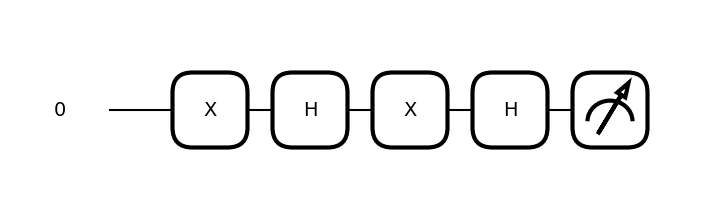

In [34]:
fig, ax = qml.draw_mpl(apply_hxh)(state)
plt.show()